<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with **real** oversampled data
Authorship: Raul Macedo

In [79]:
#General imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from utils import train_model_if_doesnt_exist,save_csv_if_doesnt_exist
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix



In [80]:
train_fill_real1 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data1.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1']).rename(columns={'0':'class'})
train_fill_real2 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data2.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1']).rename(columns={'0':'class'})
train_fill_real3 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data3.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1']).rename(columns={'0':'class'})


test1_fill = pd.read_csv('./feature_selection_results/test1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test2_fill = pd.read_csv('./feature_selection_results/test2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test3_fill = pd.read_csv('./feature_selection_results/test3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

In [81]:
train_in1_real = train_fill_real1.drop(columns=['class']).copy()
test_in1_real = test1_fill.drop(columns=['class']).copy()
train_out1_real = pd.DataFrame(train_fill_real1['class'])
test_out1_real = pd.DataFrame(test1_fill['class'])

train_in2_real = train_fill_real2.drop(columns=['class']).copy()
test_in2_real =test2_fill.drop(columns=['class']).copy()
train_out2_real =pd.DataFrame(train_fill_real2['class'])
test_out2_real =pd.DataFrame(test2_fill['class'])

train_in3_real = train_fill_real3.drop(columns=['class']).copy()
test_in3_real =test3_fill.drop(columns=['class']).copy()
train_out3_real = pd.DataFrame(train_fill_real3['class'])
test_out3_real =pd.DataFrame(test3_fill['class'])

In [82]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1_real)
test_in1n,scaler_test_in1n = normalize_data(test_in1_real)
train_out1n,scaler_train_out1n = normalize_data(train_out1_real)
test_out1n,scaler_test_out1n = normalize_data(test_out1_real)

train_in2n,scaler_train_in2n = normalize_data(train_in2_real)
test_in2n,scaler_test_in2n = normalize_data(test_in2_real)
train_out2n,scaler_train_out2n = normalize_data(train_out2_real)
test_out2n,scaler_test_out2n = normalize_data(test_out2_real)

train_in3n,scaler_train_in3n = normalize_data(train_in3_real)
test_in3n,scaler_test_in3n = normalize_data(test_in3_real)
train_out3n,scaler_train_out3n = normalize_data(train_out3_real)
test_out3n,scaler_test_out3n = normalize_data(test_out3_real)


train_out1n_real = np.ravel(train_out1n)
train_out2n_real = np.ravel(train_out2n)
train_out3n_real = np.ravel(train_out3n)


## **Case 1: Using GridSearchCV to determine MLP parameters and train model**

In [83]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron_real1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/after_data_filling/real_filled/ultron1_real1_PRP.pkl')

In [84]:
ultron_real1.get_params()

{'activation': 'logistic',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

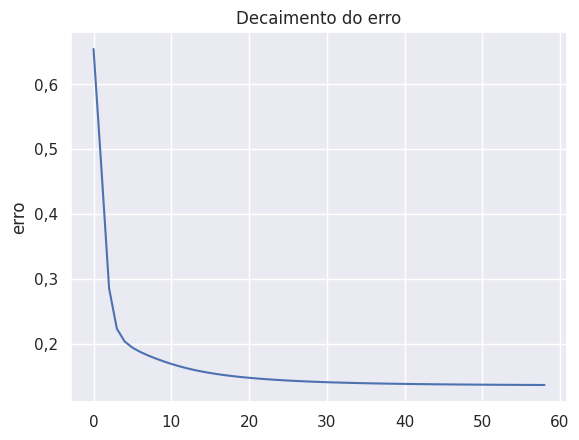

In [85]:
plt.plot(ultron_real1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 1**

In [86]:
def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    sns.set(font_scale=2)
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observado')
    plt.ylabel('Predito')
    return

def save_classifaction_report(observed_data,predicted_data,file_name:str,**kwargs):
    cls_report = classification_report(observed_data,predicted_data,output_dict=True)
    cls_report_df = pd.DataFrame(cls_report)
    accuracy = accuracy_score(observed_data,predicted_data)
    cls_report_df['accuracy'] = accuracy
    save_csv_if_doesnt_exist(cls_report_df,file_name,**kwargs)
    print(cls_report_df)
    return

                   0.0           5.0  accuracy      macro avg   weighted avg
precision      0.16944      1.000000   0.54593       0.584720       0.923062
recall         1.00000      0.499574   0.54593       0.749787       0.545930
f1-score       0.28978      0.666288   0.54593       0.478034       0.631410
support    10060.00000  98540.000000   0.54593  108600.000000  108600.000000


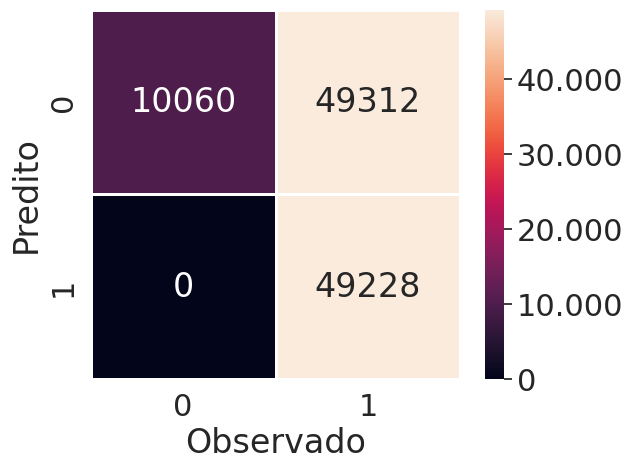

In [87]:
out1_pred1 = ultron_real1.predict(test_in1n)

out1_pred1_df = pd.DataFrame(out1_pred1)
out1_des_pred1 = scaler_test_out1n.inverse_transform(out1_pred1_df)

save_classifaction_report(test_out1_real,out1_des_pred1,'./ann_models/after_data_filling/real_filled/reports/ultron_real1_test_report.csv',decimal = ',', sep = ';', index = False)

plot_confusion_matrix(test_out1_real,out1_des_pred1)

### **Analising model with train data - case 1**

                     0.0            5.0  accuracy      macro avg  \
precision       0.998759       0.924141  0.957475       0.961450   
recall          0.914021       0.998917  0.957475       0.956469   
f1-score        0.954513       0.960075  0.957475       0.957294   
support    219275.000000  229923.000000  0.957475  449198.000000   

            weighted avg  
precision       0.960566  
recall          0.957475  
f1-score        0.957360  
support    449198.000000  


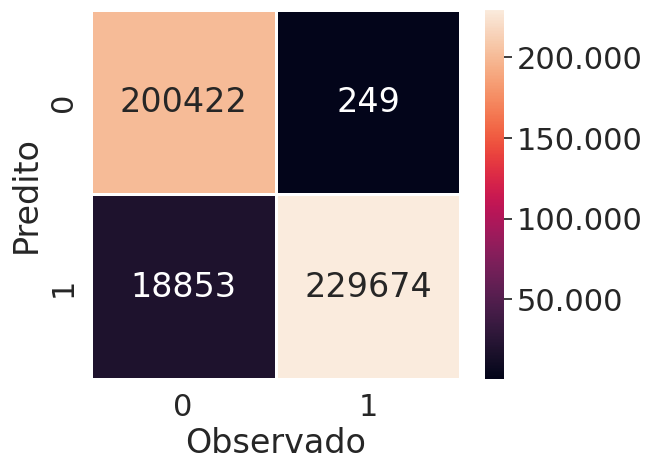

In [88]:
out1_pred2 = ultron_real1.predict(train_in1n)

out1_pred2_df = pd.DataFrame(out1_pred2)
out1_des_pred2 = scaler_train_out1n.inverse_transform(out1_pred2_df)


save_classifaction_report(train_out1_real,out1_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real1_train_report.csv',decimal = ',', sep = ';', index = False)
plot_confusion_matrix(train_out1_real,out1_des_pred2)


# **Case 2 - Taking away T-TPT & P-MON-CKP**
## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [89]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(4,4,4)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# ultron_real2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/after_data_filling/real_filled/ultron2_real2_PRP.pkl')

In [90]:
# ultron_real2

In [91]:
# ultron_real2.get_params()

In [92]:
# plt.plot(ultron_real2.loss_curve_)
# plt.title('Decaimento do erro')
# plt.ylabel('erro')

### **Analising model with test data - case 2**

In [93]:
# out2_pred = ultron_real2.predict(test_in2n)

# out2_pred_df = pd.DataFrame(out2_pred)
# out_des_pred2 = scaler_test_out2n.inverse_transform(out2_pred_df)

# save_classifaction_report(test_out2_real,out_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real2_test_report.csv',decimal = ',', sep = ';', index = False)
# plot_confusion_matrix(test_out2_real,out_des_pred2)

### **Analising model with train data - case 2**


In [94]:
# out2_pred = ultron_real2.predict(train_in2n)

# out2_pred_df = pd.DataFrame(out2_pred)
# out_des_pred2 = scaler_train_out2n.inverse_transform(out2_pred_df)

# save_classifaction_report(train_out2_real,out_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real2_train_report.csv',decimal = ',', sep = ';', index = False)
# plot_confusion_matrix(train_out2_real,out_des_pred2)

# Case 3: Desconsiderando P-TPT e P-MON-CKP
### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [95]:
ultron_real3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters2,'./ann_models/after_data_filling/real_filled/ultron3_real3_PRP.pkl')

In [96]:
ultron_real3

MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(4,),
              learning_rate='adaptive', max_iter=100)

In [97]:
ultron_real3.get_params()

{'activation': 'logistic',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (4,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

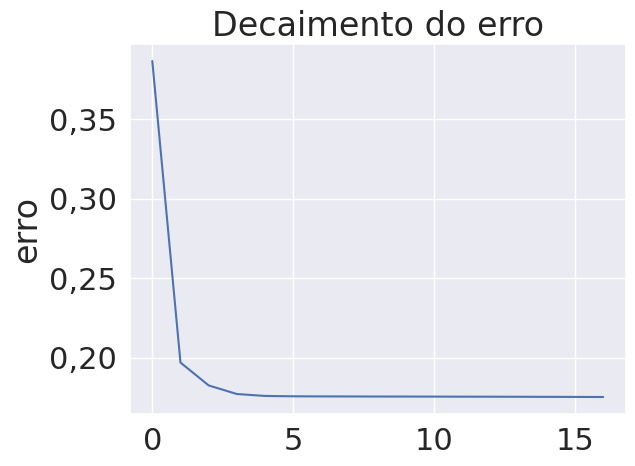

In [98]:
plt.plot(ultron_real3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**

                   0.0           5.0  accuracy      macro avg   weighted avg
precision     0.134019      0.955513      0.52       0.544766       0.879975
recall        0.772682      0.494413      0.52       0.633547       0.520000
f1-score      0.228419      0.651644      0.52       0.440032       0.612728
support    9986.000000  98614.000000      0.52  108600.000000  108600.000000


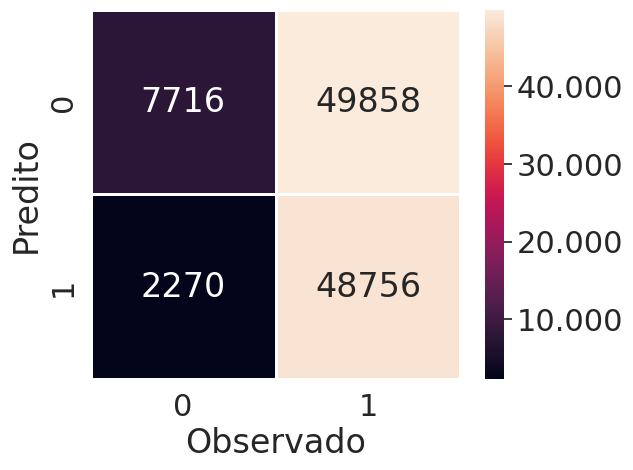

In [99]:
out3_pred1 = ultron_real3.predict(test_in3n)

out3_pred1_df = pd.DataFrame(out3_pred1)
out3_des_pred1 = scaler_test_out3n.inverse_transform(out3_pred1_df)

save_classifaction_report(test_out3_real,out3_des_pred1,'./ann_models/after_data_filling/real_filled/reports/ultron_real3_test_report.csv',decimal = ',', sep = ';', index = False)
plot_confusion_matrix(test_out3_real,out3_des_pred1)



### **Analising model with train data - case 3**

                     0.0            5.0  accuracy      macro avg  \
precision       1.000000       0.908602  0.948528       0.954301   
recall          0.894593       1.000000  0.948528       0.947296   
f1-score        0.944364       0.952112  0.948528       0.948238   
support    219349.000000  229849.000000  0.948528  449198.000000   

            weighted avg  
precision       0.953233  
recall          0.948528  
f1-score        0.948329  
support    449198.000000  


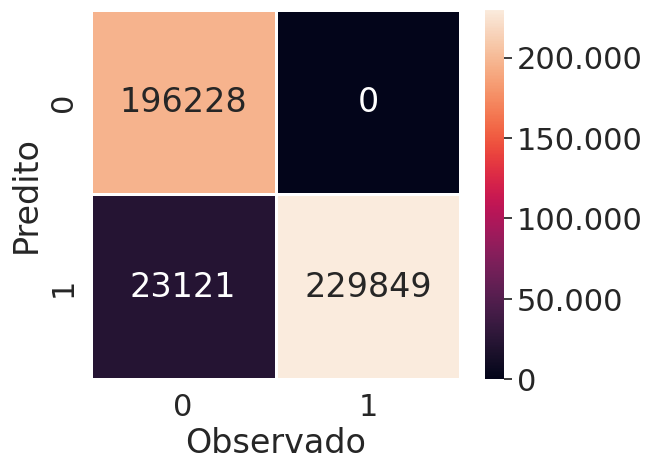

In [100]:
out3_pred2 = ultron_real3.predict(train_in3n)

out3_pred2_df = pd.DataFrame(out3_pred2)
out3_des_pred2 = scaler_train_out3n.inverse_transform(out3_pred2_df)

save_classifaction_report(train_out3_real,out3_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real3_train_report.csv',decimal = ',', sep = ';', index = False)
plot_confusion_matrix(train_out3_real,out3_des_pred2)

# ROC Curve

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score


In [102]:
y_pred_prob_ultron1 = ultron_real1.predict_proba(test_in1n)[:, 1]
# y_pred_prob_ultron2 = ultron_real2.predict_proba(test_in2n)[:, 1]
y_pred_prob_ultron3 = ultron_real3.predict_proba(test_in3n)[:, 1]

In [103]:
fpr1, tpr1, thresholds1 = roc_curve(test_out1n, y_pred_prob_ultron1)  
roc_auc1 = roc_auc_score(test_out1n, y_pred_prob_ultron1)  

# fpr2, tpr2, thresholds2 = roc_curve(test_out2n, y_pred_prob_ultron2)
# roc_auc2 = roc_auc_score(test_out2n, y_pred_prob_ultron2) 

fpr3, tpr3, thresholds3 = roc_curve(test_out3n, y_pred_prob_ultron3)
roc_auc3 = roc_auc_score(test_out3n, y_pred_prob_ultron3) 

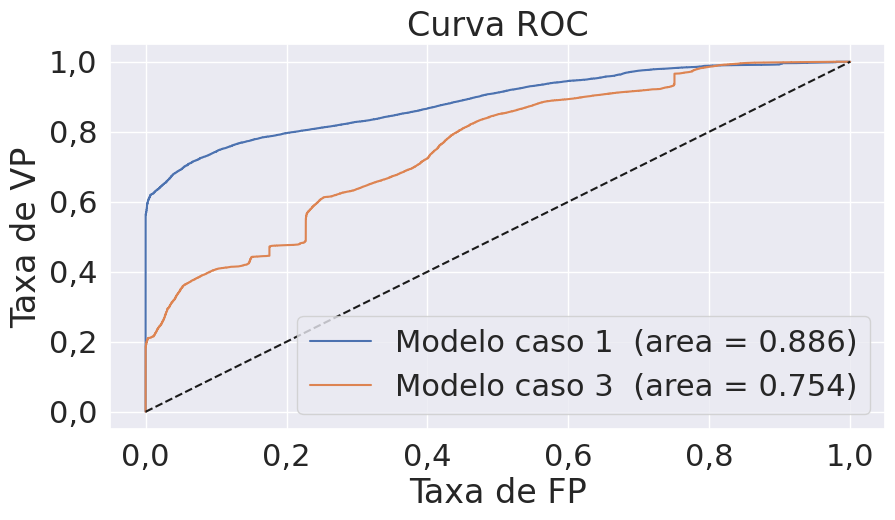

In [118]:
sns.set(font_scale=2)

fig = plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, label=f'Modelo caso 1  (area = {round(roc_auc1,3)})')
# plt.plot(fpr2, tpr2, label=f'Modelo caso 2  (area = {round(roc_auc2,3)})')
plt.plot(fpr3, tpr3, label=f'Modelo caso 3  (area = {round(roc_auc3,3)})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('Taxa de FP')
plt.ylabel('Taxa de VP')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show() 


Best Curve **Case 2**: AUC 0.858

In [105]:
import csv
with open('./RF/FPR1_RF_C1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(fpr1)
with open('./RF/TPR1_RF_C1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(tpr1)


# with open('./RF/FPR1_RF_C2.csv','w') as f:
#     writer = csv.writer(f)
#     writer.writerow(fpr2)
# with open('./RF/TPR1_RF_C2.csv','w') as f:
#     writer = csv.writer(f)
#     writer.writerow(tpr2)


with open('./RF/FPR1_RF_C3.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(fpr3)
with open('./RF/TPR1_RF_C3.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(tpr3)

In [106]:

def performance_metrics(Y_true,Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()
    recall = tp / (tp+fn)
    precision = tp / (tp+fp)
    specificity = tn / (tn+fp)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    f1_score = tp / (tp + ((fn+fp)/2))
    data = {
        'recall':[recall],
        'precision':[precision],
        'specificity':[specificity],
        'accuracy':[accuracy],
        'f1_score':[f1_score],
    }
    return pd.DataFrame(data)


In [116]:
def make_bar_plot(metrics1,metrics2,title="Comparação de Métricas de Performance"):   
    sns.set(font_scale=1)
    modelos = ['Caso 1', 'Caso 2']
    metricas = ['Recall', 'Precisão', 'Especificidade', 'Acurácia', 'F1-Score']
    valores_modelo_a = list(metrics1.values[0])
    valores_modelo_b = list(metrics2.values[0])
    width = 0.35
    posicao_metricas = np.arange(len(metricas))

    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(posicao_metricas, valores_modelo_a, width, label='Caso 1')
    rects2 = ax.bar(posicao_metricas + width, valores_modelo_b, width, label='Caso 2')
    ax.set_ylabel('Valor',fontsize=18)
    ax.set_title(title,fontsize=18)
    ax.set_xticks(posicao_metricas + width / 2)
    ax.set_xticklabels(metricas,fontsize=18)
    ax.legend(loc='lower right',fontsize=18)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    # Exibição do gráfico
    plt.tight_layout()
    plt.show()

In [108]:
metrics1_train = performance_metrics(train_out1_real,out1_des_pred2)
metrics2_train = performance_metrics(train_out3_real,out3_des_pred2)

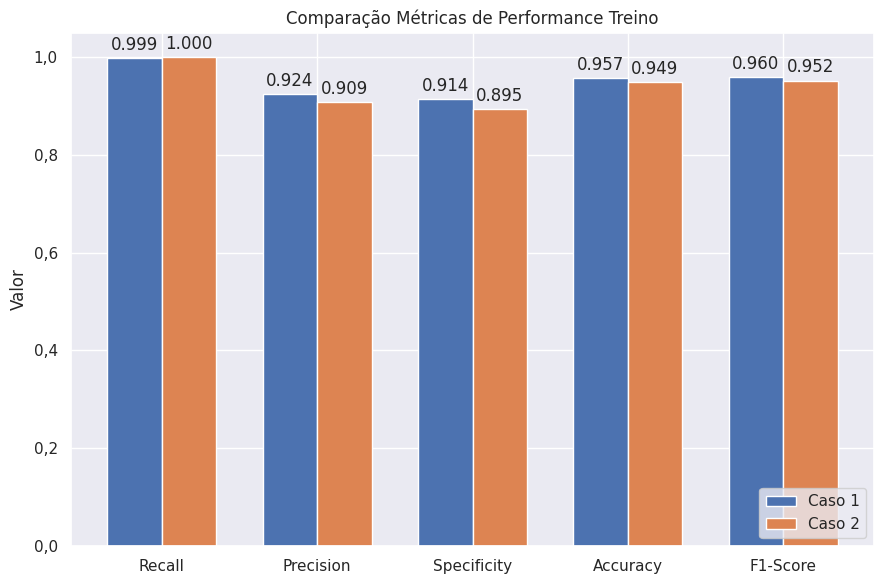

In [109]:
make_bar_plot(metrics1_train,metrics2_train,'Comparação Métricas de Performance Treino')

In [114]:
metrics1_test = performance_metrics(test_out1_real,out1_des_pred1)
metrics2_test = performance_metrics(test_out3_real,out3_des_pred1)

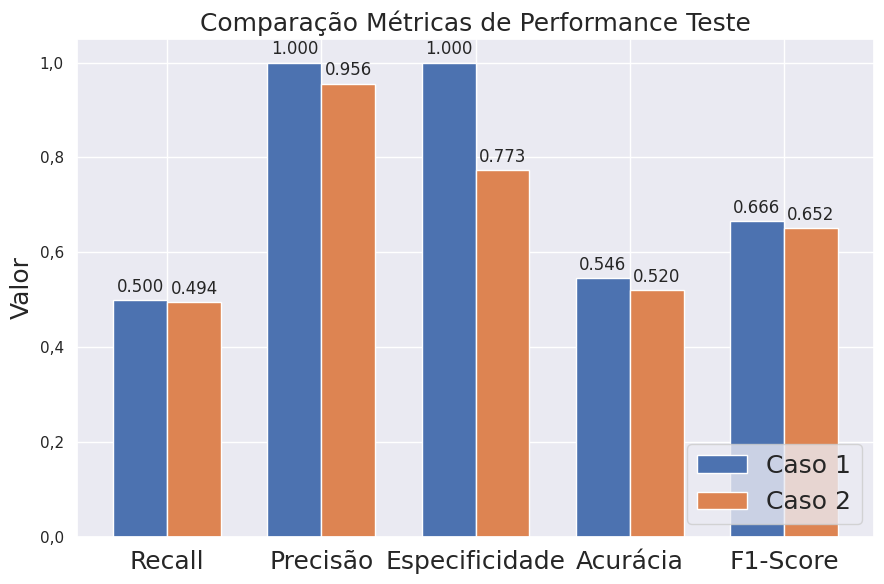

In [117]:
make_bar_plot(metrics1_test,metrics2_test,'Comparação Métricas de Performance Teste')

Save Metrics

In [120]:
save_csv_if_doesnt_exist(metrics1_test,'./metrics/analysis3/test_case1_metrics.csv')
save_csv_if_doesnt_exist(metrics2_test,'./metrics/analysis3/test_case2_metrics.csv')
save_csv_if_doesnt_exist(metrics1_train,'./metrics/analysis3/train_case1_metrics.csv')
save_csv_if_doesnt_exist(metrics1_train,'./metrics/analysis3/train_case2_metrics.csv')